In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import arviz as az
import h5py
import pandas as pd

import ringdown as rd
from tqdm import tqdm

In [2]:
%matplotlib inline 
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}
mpl.rcParams.update(params)

Text(0.5, 0, 'A221')

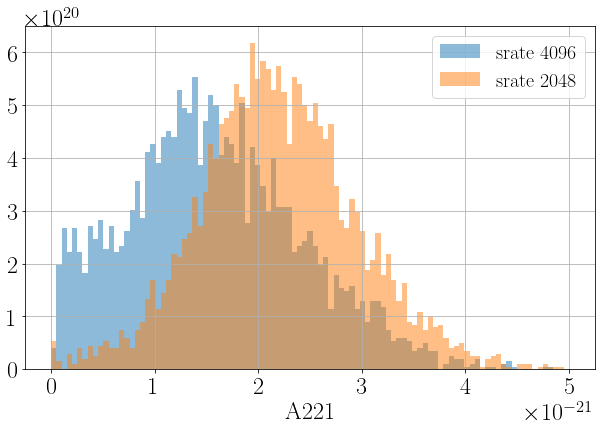

In [3]:
fit8192 = rd.Fit(model='mchi_aligned')
fit4096 = rd.Fit(model='mchi_aligned')
fit2048 = rd.Fit(model='mchi_aligned')

fit8192.result = az.from_netcdf('/work/yifan.wang/ringdown/GW150914/maxisi-data-release/my_gw150914_0603_srate8192_pystan.nc')
fit4096.result = az.from_netcdf('/work/yifan.wang/ringdown/GW150914/maxisi-data-release/my_gw150914_0602_srate4096.nc')
fit2048.result = az.from_netcdf('/work/yifan.wang/ringdown/GW150914/maxisi-data-release/my_gw150914_0603_srate2048_pystan.nc')

A8192 = fit8192.result.posterior.A.stack(samples=('chain','draw'))
A4096 = fit4096.result.posterior.A.stack(samples=('chain','draw'))
A2048 = fit2048.result.posterior.A.stack(samples=('chain','draw'))

bins = np.linspace(0,5e-21,100)
plt.hist(A4096[1].values,alpha=0.5,bins=bins,density=True,label='srate 4096')
plt.hist(A2048[1].values,alpha=0.5,bins=bins,density=True,label='srate 2048')
plt.legend()
plt.xlabel('A221')

Text(0.5, 0, 'A221')

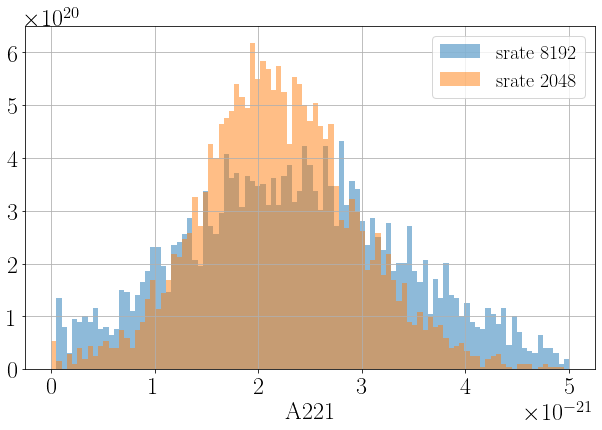

In [4]:
bins = np.linspace(0,5e-21,100)
plt.hist(A8192[1].values,alpha=0.5,bins=bins,density=True,label='srate 8192')
plt.hist(A2048[1].values,alpha=0.5,bins=bins,density=True,label='srate 2048')
plt.legend()
plt.xlabel('A221')

In [9]:
np.savetxt('./acf_ringdown_s4096_L1.txt',
           np.transpose([fit.acfs['L1'].index.values,fit.acfs['L1'].values]))

In [69]:
#PyRing start time
model.tevent

1126259462.423

In [70]:
#PyRing start time
model.time_delay

{'H1_H1': 0.0, 'H1_L1': -0.006984417432715555}

In [71]:
#PyRing start time
model.tevent + model.time_delay['H1_L1']

1126259462.4160156

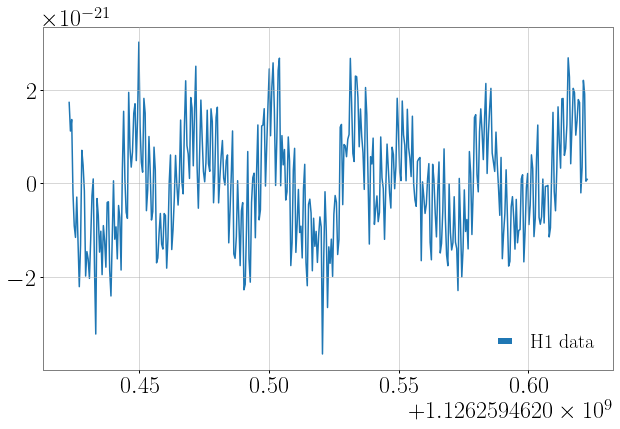

In [76]:
plt.plot(fit.analysis_data['H1'].index.values,fit.analysis_data['H1'].values,label='H1 data')
plt.legend(loc='best')

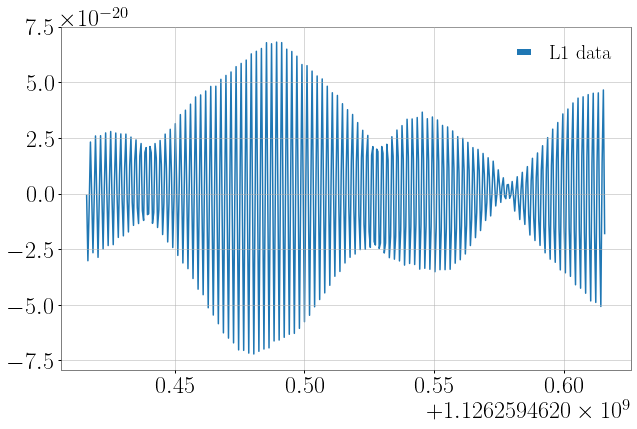

In [77]:
plt.plot(fit.analysis_data['L1'].index.values,fit.analysis_data['L1'].values,label='L1 data')
plt.legend(loc='best')

# Run Pyring

In [20]:
input_par = {'data-H1': '', 
             'data-L1': '', 
             'data-V1': '', 
             'ignore-data-filename': 0, 
             'download-data': 1, 
             'datalen-download': 4096.0, 
             'gw-data-find': 0, 
             'gw-data-type-H1': '', 
             'gw-data-type-L1': '', 
             'gw-data-type-V1': '', 
             'tag': 'CLN', 
             'channel-H1': 'GWOSC', 
             'channel-L1': 'GWOSC', 
             'channel-V1': 'GWOSC', 
             'config-file': 'config_gw150914_production.ini', 
             'run-type': 'full', 
             'output': 'GW150914_PROD1_Kerr_221_0M', 
             'run-tag': 'PROD1', 
             'screen-output': 0, 
             'pesummary': 1, 
             'trigtime': 1126259462.423, 
             'detectors': ['H1', 'L1'], 
             'ref-det': 'H1', 
             'sky-frame': 'equatorial', 
             'acf-H1': '', 
             'acf-L1': '', 
             'acf-V1': '', 
             'psd-H1': '', 
             'psd-L1': '', 
             'psd-V1': '', 
             'signal-chunksize': 4.0, 
             'noise-chunksize': 4.0, 
             'window-onsource': 0, 
             'window': 1, 
             'alpha-window': 0.1, 
             'sampling-rate': 2048, 
             'f-min-bp': 20.0, 
             'f-max-bp': 1014.0, 
             'bandpassing': 1, 
             'fft-acf': 1, 
             'acf-simple-norm': 1, 
             'no-lognorm': 0, 
             'truncate': 1, 
             'analysis-duration': 0.2, 
             'analysis-duration-n': int(0.2*2048),
             'zero-noise': 0, 
             'gaussian-noise': '', 
             'gaussian-noise-seed': -1, 
             'gaussian-noise-white-sigma': 1e-21, 
             'chisquare-computation': 0, 
             'non-stationarity-check': 0, 
             'onsource-ACF': 0, 
             'noise-averaging-method': 'mean', 
             'Dirac-comb': 0, 
             'Zeroing-data': 0, 
             'maxent-psd': '', 
             'PSD-investigation': 0, 
             'injection-parameters': None, 
             'injection-approximant': '', 
             'inject-n-ds-modes': {'t': 1}, 
             'inject-area-quantization': 0, 
             'inject-charge': 0, 
             'injection-scaling': 1.0, 
             'injection-T': 64.0, 
             'template': 'Kerr', 
             'single-mode': None, 
             'n-ds-modes': {'t': 1}, 
             'ds-ordering': 'freq', 
             'kerr-modes': [(2, 2, 2, 0), (2, 2, 2, 1)], 
             'reference-amplitude': 1e-21, 
             'spheroidal': 0, 
             'qnm-fit': 1, 
             'coherent-n': 0, 
             'amp-non-prec-sym': 1, 
             'max-Kerr-amp-ratio': 0.0, 
             'TGR-overtones-ordering': 'Unordered', 
             'domega-tgr-modes': None, 
             'dtau-tgr-modes': None, 
             'area-quantization': 0, 
             'tau-AQ': 0, 
             'prior-reweight': 0, 
             'ParSpec': 0, 
             'ParSpec_Dmax_TGR': 2, 
             'ParSpec_Dmax_charge': 0, 
             'EsGB': 0, 
             'charge': 0, 
             'gr-time-prior': 1, 
             'dist-flat-prior': 0, 
             'ds-amp-flat-prior': 0, 
             'mf-time-prior': 67.92493161247017, 
             'nonref-det': 'L1'}
model = pyRing.KerrModel(modes=input_par['kerr-modes'],**input_par)


Trigtime in H1: 1126259462.423000


Reading data...

Using GWPY to download data.
Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]

Loaded channel GWOSC starting at 1126257414.0 length 4096.0s.
Bandpassing the raw strain between [20.0, 1014.0] Hz.
Downsampling detector data from 16384.0 to 2048 Hz, decimate factor 8
Computing the one-sided PSD with the Welch method and the standard ACF for comparison.
No ACF was passed. Estimating ACF.
Plancherel theorem E(f)/E(t) (expected value: 1) = 1.0658423205057252

Reading data...

Using GWPY to download data.
Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]

Loaded channel GWOSC starting at 1126257414.0 length 4096.0s.
Bandpassing the raw strain between [20.0, 1014.0] Hz.
Downsampling detector data from 16384.0 to 2048 Hz, decimate factor 8
Computing the one-sided PSD with the Welch method and the standard ACF for comparison.
No ACF was passed. Es

In [43]:
pr_par = {'Mf': 71.23144804,
 'af': 0.70217625,
 'A2220': 7.455027339179161,
 'A2221': 7.7018212353194695,
 'phi2220': -0.8654620165770146,
 'phi2221': 1.7441770208736807}
model.log_likelihood(pr_par)

39342.91014056111

In [79]:
prdata = {}
prtime = {}
for d in model.detectors:
    dt   = model.time_delay['{0}_'.format(model.ref_det)+d]
    relative_time = model.detectors[d].time - (model.tevent+dt)
    logic = relative_time >= model.fixed_params['t']
    prtime[d] = relative_time[logic][:model.duration_n] + (model.tevent+dt)
    prdata[d] = model.detectors[d].time_series[logic][:model.duration_n]

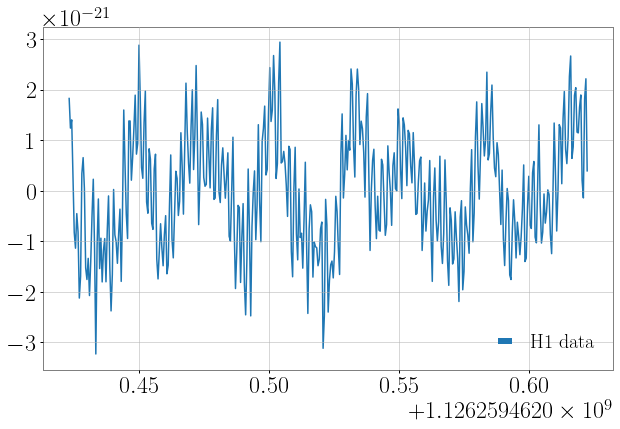

In [80]:
plt.plot(prtime['H1'],prdata['H1'],label='H1 data')
plt.legend(loc='best')

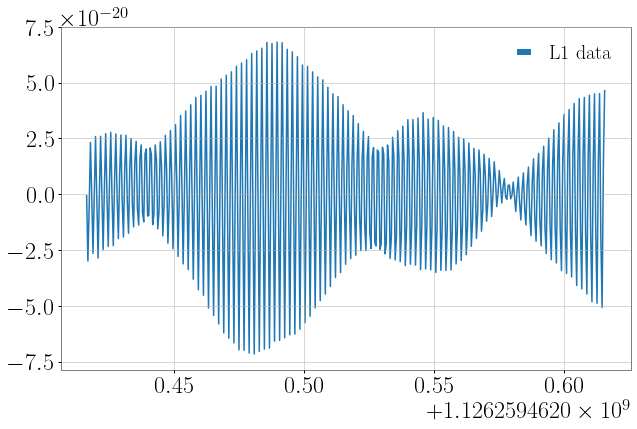

In [81]:
plt.plot(prtime['L1'],prdata['L1'],label='L1 data')
plt.legend(loc='best')

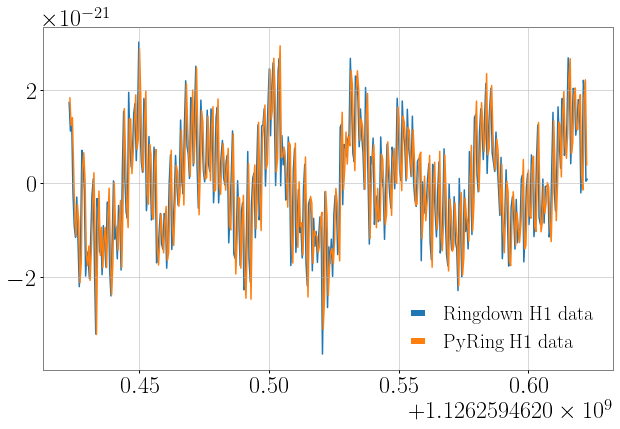

In [82]:
plt.plot(fit.analysis_data['H1'].index.values,fit.analysis_data['H1'].values,label='Ringdown H1 data')
plt.plot(prtime['H1'],prdata['H1'],label='PyRing H1 data')
plt.legend(loc='best')

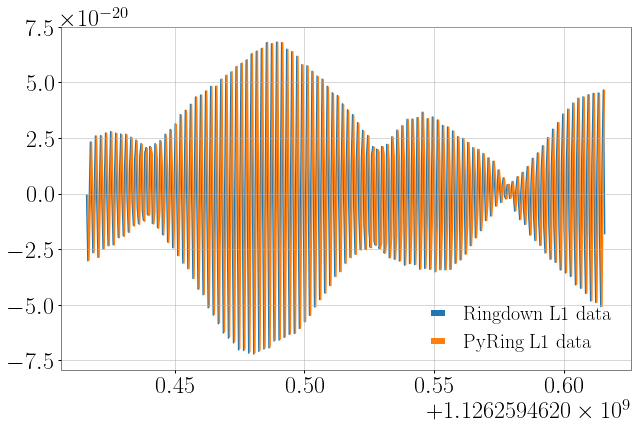

In [83]:
plt.plot(fit.analysis_data['L1'].index.values,fit.analysis_data['L1'].values,label='Ringdown L1 data')
plt.plot(prtime['L1'],prdata['L1'],label='PyRing L1 data')
plt.legend(loc='best')